In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.signal import lti 
from scipy.signal import lti 
from scipy import stats
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy import signal as sg
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import gamma
from scipy.fft import fft, fftfreq
!pip install control
import control
import sklearn
!pip install fitter


<ipython-input-1-fbf7d5f1ede6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=15dba04776d5c29abe50fcf3619f1558b58794ac10db9c75cc011eb25655a800
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


#*GENERACION RUIDO GAUSSIANO*
Es una señal de carácter aleatorio caracterizada por la no 
relación que tienen sus valores en distintos tiempos entre sí, 
es decir, el ruido blanco tiene como característica notable la 
no correlación estadística entre sus valores.

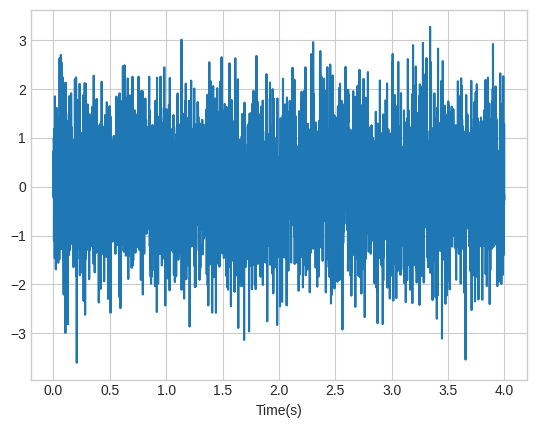

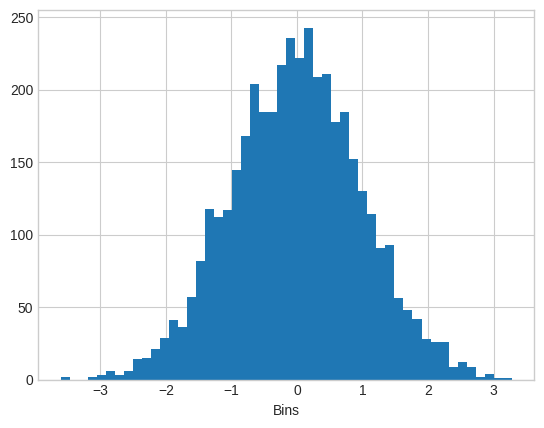

In [50]:
Nsample=4096
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t1=np.arange(0,4,Tdisc)
signal = np.random.normal(size=len(t1),loc=0 )

plt.plot(t1,signal)
plt.xlabel("Time(s)")
plt.show()
# plot a histogram of the sampl
plt.hist(signal, bins=50)
plt.xlabel("Bins")
plt.show()
print()

*Miramos los parametros de la funcion de distribucion*

In [3]:
mean,std=stats.distributions.norm.fit(signal)

print(f'la media es: {mean}\n la varianza es {std}')

la media es: 0.00708649495212624
 la varianza es 0.9818495362142711


#*Funcion de Correlacion*

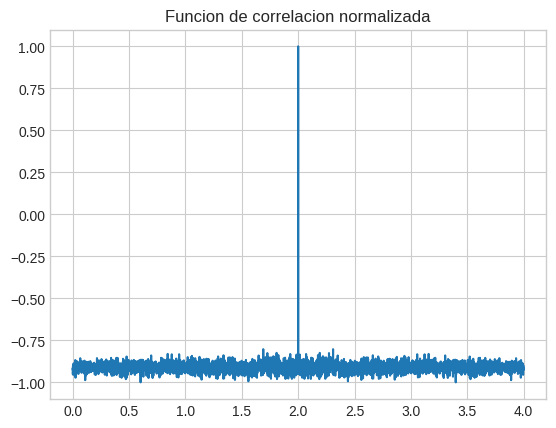

In [51]:
from numpy import linalg as LA
from sklearn.preprocessing import normalize
Autocorrelacion_expt=np.correlate(signal,signal,mode="same")

def normalize(tSignal):
      # copy the data if needed, omit and rename function argument if desired
      signal = np.copy(tSignal) # signal is in range [a;b]
      signal -= np.min(signal) # signal is in range to [0;b-a]
      signal /= np.max(signal) # signal is normalized to [0;1]
      signal -= 0.5 # signal is in range [-0.5;0.5]
      signal *=2 # signal is in range [-1;1]
      return signal
x_normed = normalize(Autocorrelacion_expt)
x_d = np.linspace(-3, 3, Nsample)
# plt.plot(Autocorrelacion_expt, np.full_like(x_d, -0.01), '|k', markeredgewidth=1)
#Convertidor de db a gain
# control.db2mag()
'''
superposicion ruido blanco gaussiano y senoidal
'''

#Ploto nnormalizdo
plt.plot(t1,x_normed)
plt.title('Funcion de correlacion normalizada')
plt.show()

##*Analisis caso externo: Adicion de ruido blanco gaussiano a una funcion de cosenoidal*

*creacion de signal gaussian y cosenoidal*

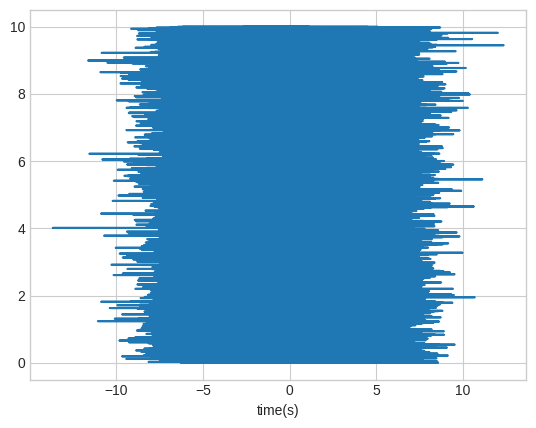

In [52]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)
plt.plot(x,time)
plt.xlabel('time(s)')
plt.show()

*Funcion de Correlacion superposicion de senales*

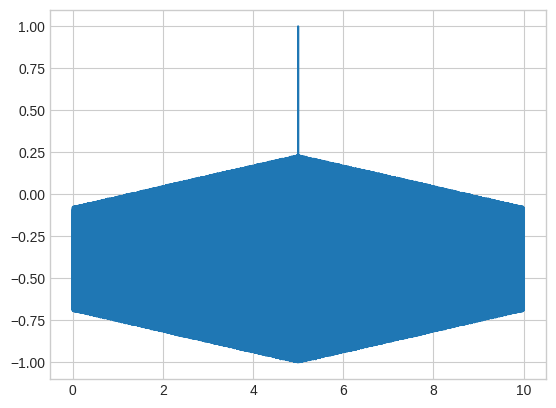

In [57]:
Autocorrelacion_expt=np.correlate(x,x,mode="same")
Autocorrelacion_expt=normalize(Autocorrelacion_expt)
plt.plot(time,Autocorrelacion_expt)

plt.legend()
plt.show()

*Funcion de densidad espectral superposicion de senales*

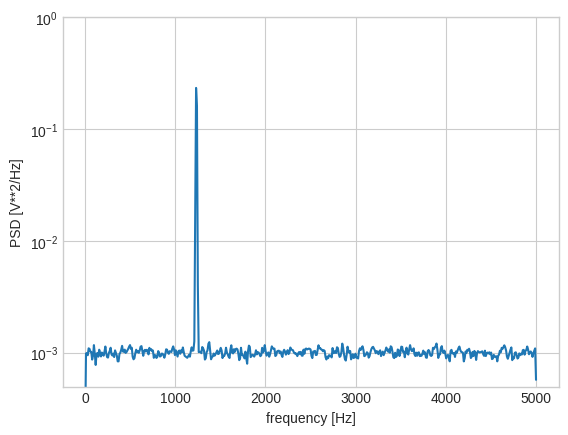

In [54]:
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

#*Espectro de Potencia entrada*

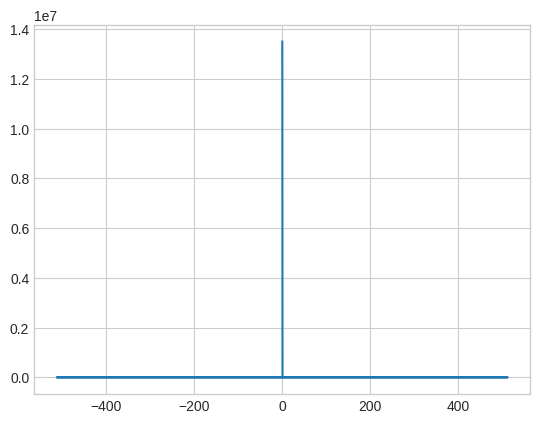

In [15]:
f=fft(x_normed)
freq=np.fft.fftfreq(len(Autocorrelacion_expt),d=t1[1]-t1[0])
plt.plot(freq, abs(f)**2) 

#*Funcion de transferencia*

In [8]:
#importamos las librerias para crear el circuito 
!pip install lcapy
!apt install texlive-latex-base
!apt-get install texlive-latex-extra
!apt-get update && apt-get install -y --no-install-recommends \
    texlive-fonts-recommended \
    texlive-latex-extra \
    texlive-fonts-extra \
    dvipng \
    lmodern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
 

/usr/local/lib/python3.10/dist-packages/lcapy/schematic.py:593: UserWarning: Have circuitikz version 1.0; should upgrade to 1.4.5 or later
  warn('Have circuitikz version %s; should upgrade to %s or later'


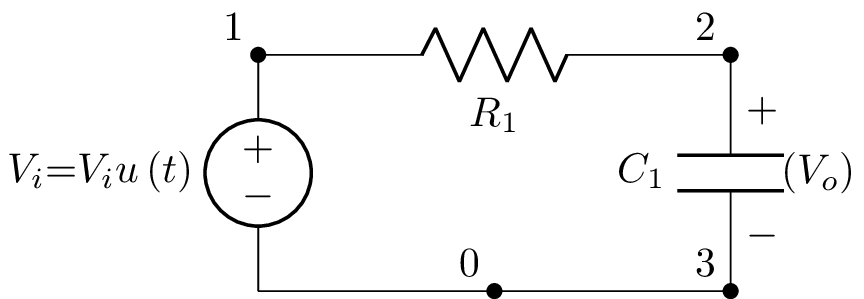

In [9]:
from lcapy import Circuit, j, omega, s
ctt=Circuit("""
Vi 1 0_1 step;down
R1 1 2; right, size=1.5
C1 2 3; down,v=(V_o)

W 0_1 0;right
W 0 3;right
"""
)
ctt.draw() # Resolver

*Funcion de Transferencia*

In [10]:
H=(ctt.R1.V(s)/ctt.Vi.V(s)).simplify()
H

  C₁⋅R₁⋅s  
───────────
C₁⋅R₁⋅s + 1

In [16]:
#Dando valores al circuito:
C1=1*10**(-6)
R1=1000
# R2=2000
Coeficientes_num=[1] #Coeficientes numerador
Coeficientes_dem=[C1*R1,1] #Coeficientes denominador=4.7e-4
Low_f=control.tf(Coeficientes_num,Coeficientes_dem)
Low_f

TransferFunction(array([1]), array([0.001, 1.   ]))

*Diagrama de Bode*

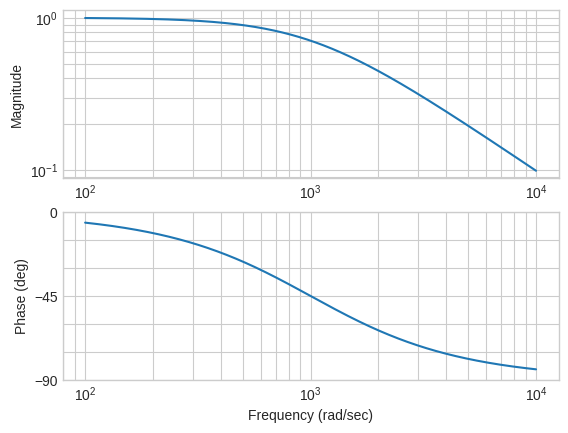

In [12]:
mag,phase,omega = control.bode(Low_f)

In [13]:
H=H.subs("C1",C1).subs("R1",R1)
H

       s       
───────────────
     ⎛ s      ⎞
1000⋅⎜──── + 1⎟
     ⎝1000    ⎠

#*Espectro de potencia en la salida*

*Tenemos que tener encuenta que para obtener el espectro de potencia a la salida del ciruito por fourier podemos hacer*
$\delta_y[\omega] = $

In [17]:
sy=f*abs(H)**2
sy

array([LaplaceDomainTransferFunction(-4593876229575867*(1000000000000*((re(s) + 1000)*re(s) + im(s)**2)**2 + 1000000000000000000*im(s)**2)/(1250000000000*(1000000*(re(s) + 1000)**2 + 1000000*im(s)**2)**2)),
       LaplaceDomainTransferFunction((-30275276453765193/100000000000000000 - 107742590890747*j/1562500000000000000000000000000)*(1000000000000*((re(s) + 1000)*re(s) + im(s)**2)**2 + 1000000000000000000*im(s)**2)/(1000000*(re(s) + 1000)**2 + 1000000*im(s)**2)**2),
       LaplaceDomainTransferFunction((1194855624749957/1250000000000000 + 4623038063478191*j/10000000000000000000000000000000)*(1000000000000*((re(s) + 1000)*re(s) + im(s)**2)**2 + 1000000000000000000*im(s)**2)/(1000000*(re(s) + 1000)**2 + 1000000*im(s)**2)**2),
       ...,
       LaplaceDomainTransferFunction((-1075512183815539/5000000000000000 - 2491496592371689*j/10000000000000000000000000000000)*(1000000000000*((re(s) + 1000)*re(s) + im(s)**2)**2 + 1000000000000000000*im(s)**2)/(1000000*(re(s) + 1000)**2 + 1000000*im(s